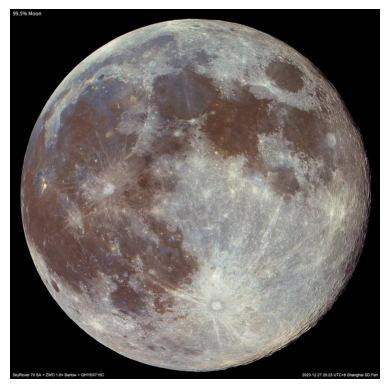

(1280, 1280, 3)


In [1]:
# 实例 7
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import torch
import torchvision.transforms as transforms

myimg = mpimg.imread('img.jpg') # 读取和代码处于同一目录下的图片
plt.imshow(myimg) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
print(myimg.shape)

In [2]:
pil2tensor = transforms.ToTensor()
rgb_image = pil2tensor(myimg)
print(rgb_image[0][0])
print(rgb_image.shape)

tensor([0., 0., 0.,  ..., 0., 0., 0.])
torch.Size([3, 1280, 1280])


d:\Tools\Anaconda\envs\pytorch\Lib\site-packages\torchvision\transforms\functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [3]:
# 定义 sobel 卷积核
sobelfilter =  torch.tensor([[-1.0,0,1],  [-2,0,2],  [-1.0,0,1.0]]*3).reshape([1,3,3, 3])

print(sobelfilter)

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])


tensor([[[[127, 127, 127,  ..., 127, 127, 127],
          [127, 127, 127,  ..., 127, 127, 127],
          [127, 127, 127,  ..., 127, 127, 127],
          ...,
          [127, 127, 127,  ..., 127, 127, 128],
          [127, 127, 127,  ..., 127, 127, 127],
          [127, 127, 127,  ..., 127, 127, 127]]]], dtype=torch.int32)


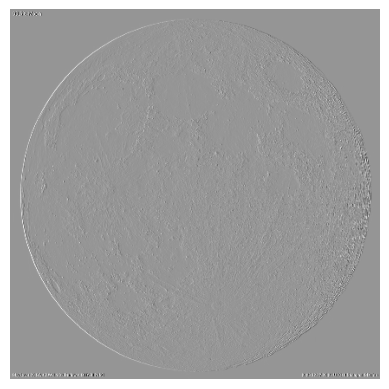

torch.Size([1, 85, 85, 1])


In [4]:
op =torch.nn.functional.conv2d(rgb_image.unsqueeze(0), sobelfilter, stride=3,padding = 1) #3个通道输入，生成1个feature map



ret = (op - op.min()).div(op.max() - op.min())
ret =ret.clamp(0., 1.).mul(255).int()
print(ret)

plt.imshow(ret.squeeze(),cmap='Greys_r') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

op=torch.nn.functional.max_pool2d(op,kernel_size =5, stride=5)
op = op.transpose(1,3).transpose(1,2)
print(op.shape)